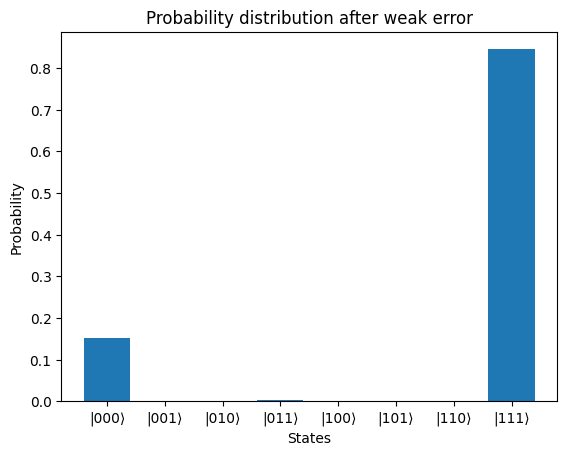

Probabilities of states after weak error:
State |000⟩: 0.1510
State |001⟩: 0.0000
State |010⟩: 0.0000
State |011⟩: 0.0040
State |100⟩: 0.0000
State |101⟩: 0.0000
State |110⟩: 0.0000
State |111⟩: 0.8450




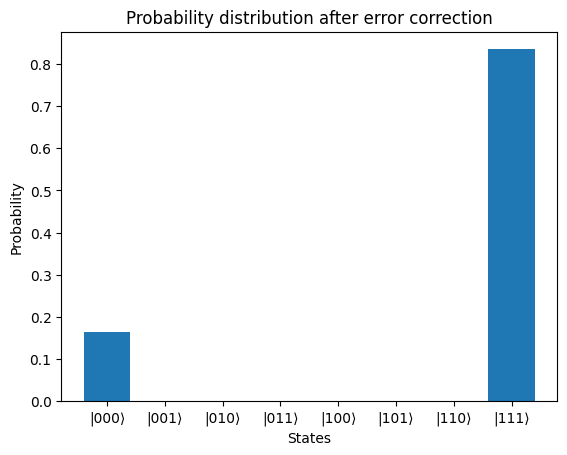

Probabilities of states after error correction:
State |000⟩: 0.1640
State |001⟩: 0.0000
State |010⟩: 0.0000
State |011⟩: 0.0000
State |100⟩: 0.0000
State |101⟩: 0.0010
State |110⟩: 0.0000
State |111⟩: 0.8350




In [1]:
# Importing necessary libraries
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_probs(probs, description=""):
    states = [f"|{i:03b}⟩" for i in range(8)]
    plt.bar(states, probs)
    plt.xlabel('States')
    plt.ylabel('Probability')
    plt.title(f'Probability distribution after {description}')
    plt.show()
    # Print the probabilities
    print(f"Probabilities of states after {description}:")
    for i, p in enumerate(probs):
        print(f"State |{i:03b}⟩: {p:.4f}")
    print("\n")
    
# Define the number of qubits
n_qubits = 3

# Initialize a device
dev = qml.device('default.qubit', wires=n_qubits, shots=1000)

# Define the initial state preparation function
def initial_state(alpha, beta):
    qml.RY(2 * np.arccos(alpha), wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

# Define the weak error operation
def apply_weak_error():
    qubit_to_flip = random.randint(0, 2)
    epsilon = 0.1
    qml.RX(epsilon, wires=qubit_to_flip)


@qml.qnode(dev)
def circuit1(alpha, beta):
    initial_state(alpha, beta)
    apply_weak_error()
    
    return qml.probs(wires=[0, 1, 2])

# Define the circuit with error correction
@qml.qnode(dev)
def circuit2(alpha, beta):
    initial_state(alpha, beta)
    apply_weak_error()
    
    # Measure the stabilizers
    Z1Z2 = qml.sample(qml.PauliZ(0) @ qml.PauliZ(1))
    Z1Z3 = qml.sample(qml.PauliZ(0) @ qml.PauliZ(2))
    
    # Define error correction based on the stabilizer measurements
    if Z1Z2 == 1 and Z1Z3 == 1:
        pass
    elif Z1Z2 == -1 and Z1Z3 == -1:
        qml.PauliX(wires=0)
    elif Z1Z2 == -1 and Z1Z3 == 1:
        qml.PauliX(wires=1)
    elif Z1Z3 == 1 and Z1Z2 == -1:
        qml.PauliX(wires=2)
    
    # Measure the corrected state after error correction
    corrected_state = qml.probs(wires=[0, 1, 2])
    
    # Return stabilizer measurements and corrected state
    return Z1Z2, Z1Z3, corrected_state

# Parameters for the state |ψ⟩ = α|000⟩ + β|111⟩
alpha = 0.4
beta = np.sqrt(1 - alpha ** 2)

probs_error = circuit1(alpha, beta)
plot_probs(probs_error, description="weak error")

# Run the circuit with error correction
Z1Z2, Z1Z3, corrected_state = circuit2(alpha, beta)
plot_probs(corrected_state, "error correction")

